In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ml-labs/adult.csv')

Так как данный датасет используется в части лабораторных работ, то опущу этап изучения датасета

In [4]:
df[df == '?'] = np.nan


for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-4-839e813fca23>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [5]:
X = df.drop(['income'], axis=1)

y = df['income']

In [6]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat = encoder.fit_transform(X[categorical_cols])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [8]:
X_processed = np.hstack((X_num, X_cat))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=7)

tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

In [18]:
from sklearn.metrics import f1_score

print('Model accuracy score: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model accuracy score: 0.6213


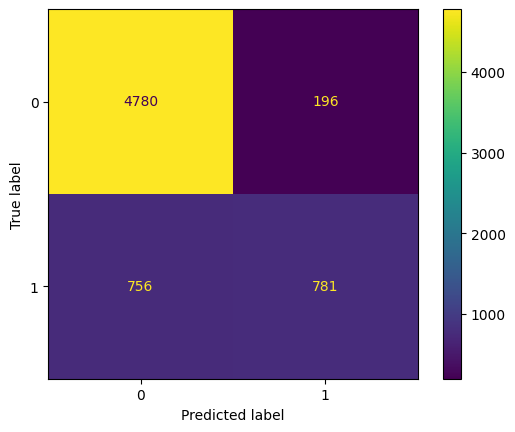

In [20]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()